In [ ]:
## Data Analysis and my first Logistic Regression model (binary classification)
## Data set looks at group of people who incurred heart failure - binary classification: survived or died

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\v-joecamp\OneDrive - Microsoft\Desktop\Jupyter Notebook\heart_failure_clinical_records_dataset.csv')
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


<Axes: >

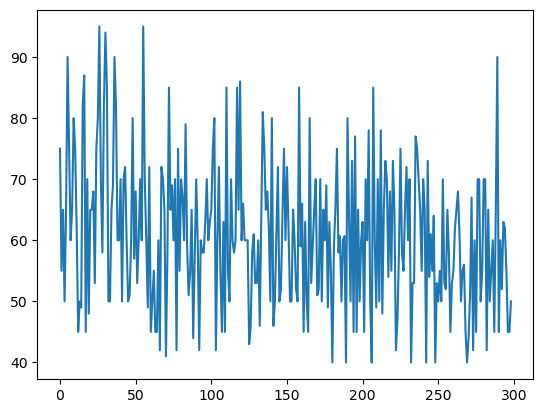

In [3]:
age_list = data['age']
age_list.plot()

In [4]:
ave_age = data['age'].mean
print(ave_age)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64>


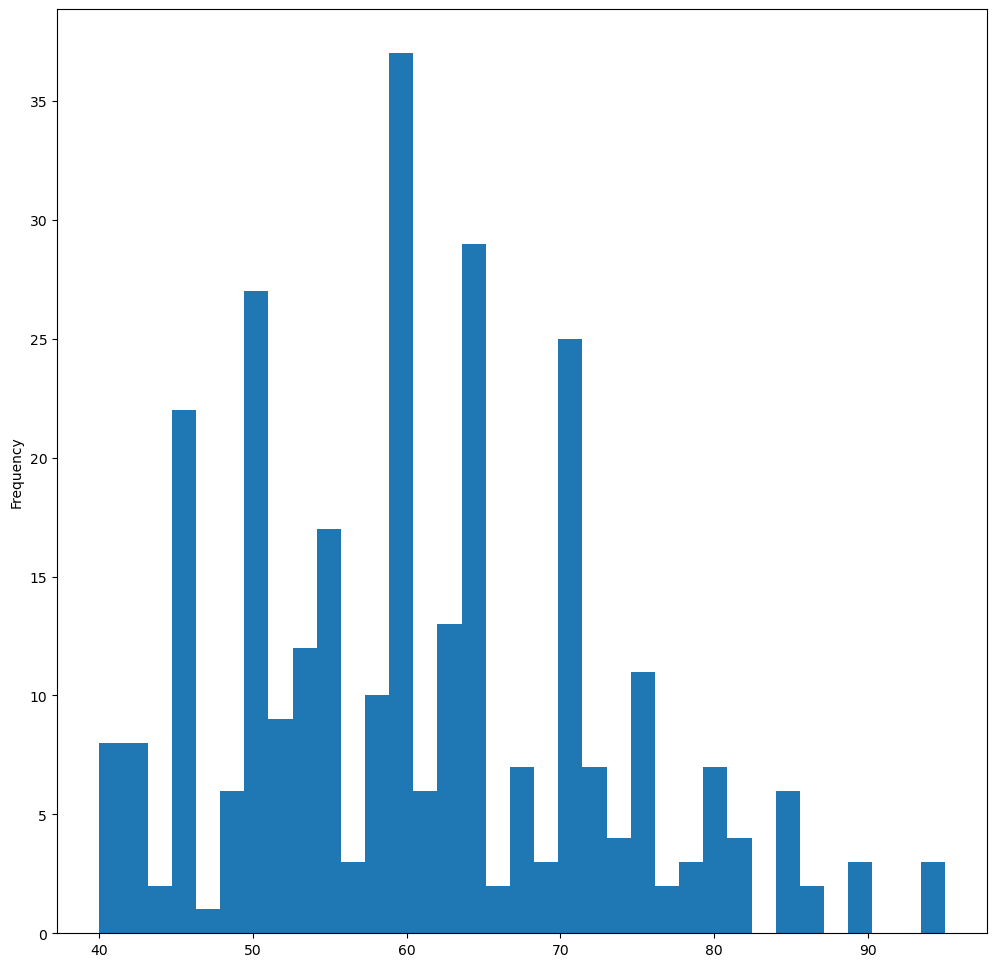

In [5]:
data['age'].plot(kind='hist', bins=35, figsize=(12,12))
plt.show()

In [6]:
###Comparing those who died to those who did not die### 

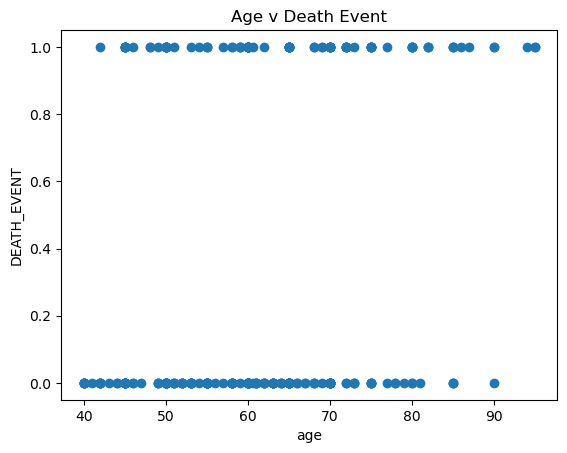

In [7]:
## Build a Scatter Plot
plt.scatter(data['age'], data['DEATH_EVENT'])
plt.title('Age v Death Event')
plt.xlabel('age')
plt.ylabel('DEATH_EVENT')
plt.show()

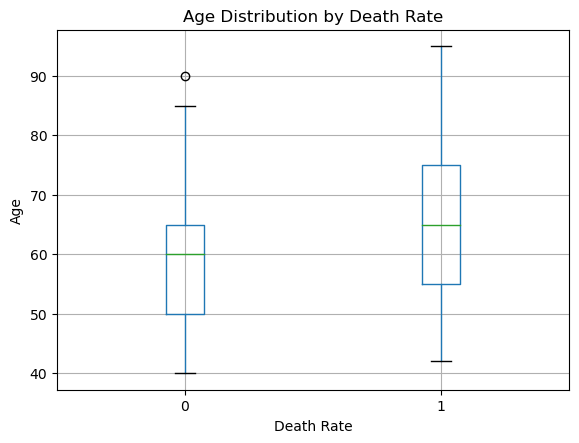

In [8]:
## building a box plot - comparing the age of those with heart failure who survived versus those who died
data.boxplot(column= 'age' , by='DEATH_EVENT')
plt.title('Age Distribution by Death Rate')
plt.suptitle('')
plt.xlabel('Death Rate')
plt.ylabel('Age')
plt.show()

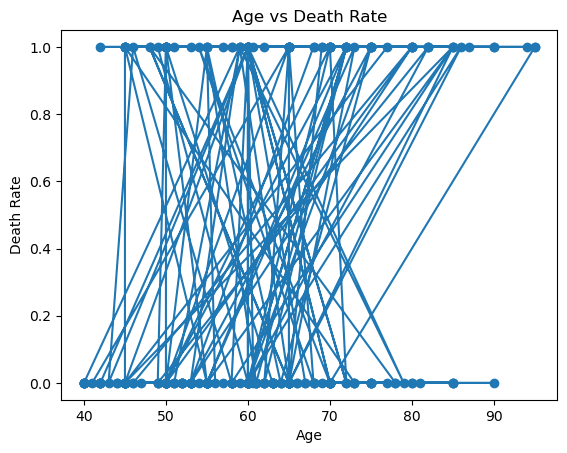

In [9]:
##line plot
plt.plot(data['age'], data['DEATH_EVENT'], marker='o')
plt.title("Age vs Death Rate")
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.show()

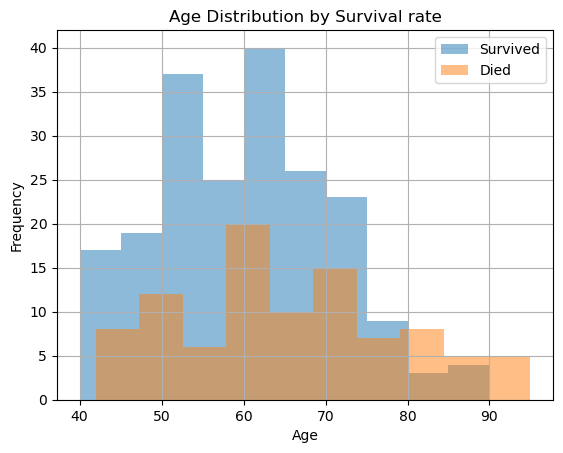

In [10]:
##building a histogram of those with heart failure who survived compared to those who died
data[data['DEATH_EVENT'] == 0]['age'].hist(alpha=0.5, label='Survived')

data[data['DEATH_EVENT'] ==1]['age'].hist(alpha=0.5, label='Died')

plt.title('Age Distribution by Survival rate')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [11]:
##filter the original data set by building data set of those who died - died_data set
died_data = data[data['DEATH_EVENT'] == 1]
died_data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
counts = died_data['sex'].value_counts()
print(counts)

sex
1    62
0    34
Name: count, dtype: int64


In [13]:
counts = died_data['anaemia'].value_counts()
print(counts)

anaemia
0    50
1    46
Name: count, dtype: int64


In [14]:
counts = died_data['diabetes'].value_counts()
print(counts)

diabetes
0    56
1    40
Name: count, dtype: int64


In [15]:
counts = died_data['smoking'].value_counts()
print(counts)

smoking
0    66
1    30
Name: count, dtype: int64


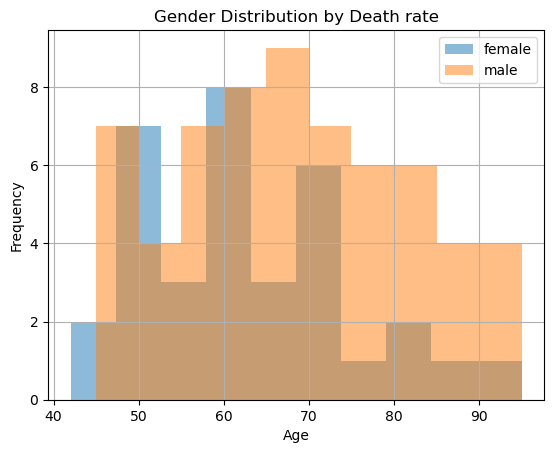

In [16]:
## build a histogram of those who died by sex
died_data[died_data['sex'] == 0]['age'].hist(alpha=0.5, label='female')

died_data[died_data['sex'] ==1]['age'].hist(alpha=0.5, label='male')

plt.title('Gender Distribution by Death rate')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

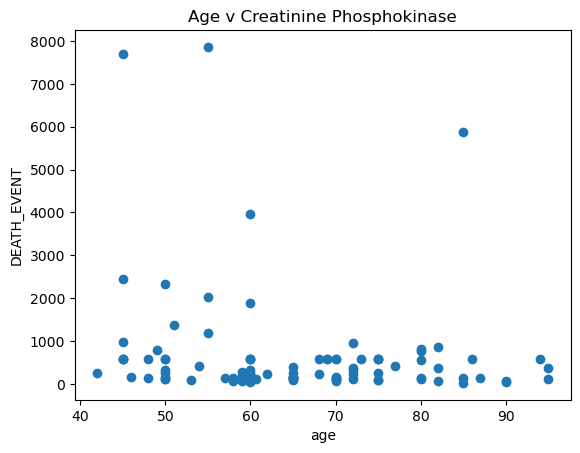

In [17]:
## Build a Scatter Plot
plt.scatter(died_data['age'], died_data['creatinine_phosphokinase'])
plt.title('Age v Creatinine Phosphokinase')
plt.xlabel('age')
plt.ylabel('DEATH_EVENT')
plt.show()

In [40]:
##Regression Model - single variable - using Logistic regression for this test - classification model

In [18]:
X = data[['age']]
y = data['DEATH_EVENT']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[52  1]
 [30  7]]


In [ ]:
##Results based on Confusion Model:
##True Negative (TN) - the model correctly predicted 52 instances where the patient did not die (0)
##False Postive (FP)- model incorrectly predicted 1 instance where the patient did not die but the model predicted they would die (1)
##False Negative (FN): Model incorrectly predicted 30 instances where the patient died but the model predicted they would not die (0)
##True Positive (TP)- model correctly predicted 7 instances where the patient died (1)

In [ ]:
#calculate the accuracy of this model

#accuracy = (TP + TN)/(TP+TN+FN+FP)

In [1]:
accuracy = (7+52)/(52+1+30+7)
print(accuracy)

0.6555555555555556


In [ ]:
##66% accuracy is not a great result. need to improve the model's accuracy. 
### if we try reducing the size of the test size from .3 (30% of the total data set) to .2 (20% of the toal data set)
## how does this impact the accuracy of the model? 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[35  0]
 [21  4]]


In [38]:
#accuracy = (TP + TN)/(TP+TN+FN+FP)
## I know you can calculate accuracy through code but I wanted to do the simple math. 

accuracy = (35+4)/(35+0+21+4)
print(accuracy)

0.65


In [39]:
#lowering the test pool decreased the accuracy of the model.
# let's keep the test data set at 30% (of the total) and increase the random state parameter from 42 to 55

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[60  4]
 [18  8]]


In [53]:
#accuracy = (TP + TN)/(TP+TN+FN+FP)

accuracy = (60+8)/(60+4+18+8)
print(accuracy)

0.7555555555555555


In [ ]:
#75% accuracy is much better.
#if we adjust the random state a bit more will we improve accuracy?
#let's try 65

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

In [84]:
model.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[64  0]
 [21  5]]


In [87]:
#accuracy = (TP + TN)/(TP+TN+FN+FP)

accuracy = (64+5)/(64+0+21+5)
print(accuracy)

0.7666666666666667


In [ ]:
## We are now at 77% accuracy - much better than the initial 66% accuracy